In [124]:
import numpy as np
import random
np.set_printoptions(suppress=True)

In [125]:
life = lambda x: x*0.0042083333333333-0.2425

In [126]:
years = range(66, 120)
probs = list(map(life, years))

In [127]:
annual_state_pension = 9653.72

In [128]:
def sim_run():
    year = 0
    values_sum = 0
    discount_rate = np.random.normal(0.03, 0.01, 1)[0]
    for annual_death_probability in probs:
        random_var = random.uniform(0, 1)
        is_dead = random_var < annual_death_probability
        if is_dead:
            return values_sum
        else:
            year+=1
            discount_factor = 1/(1*(1+discount_rate) ** year)
            income = annual_state_pension * discount_factor
            values_sum+=income
            continue

In [129]:
vals = []
for i in range(1000):
    vals.append(sim_run())

In [130]:
import matplotlib.pyplot as plt

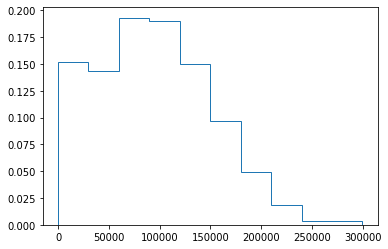

In [131]:
#test = plt.hist(vals, bins=10, density=True, stacked=True)
counts, bins = np.histogram(vals)
density = counts / sum(counts)
plt.stairs(density, bins)
plt.ticklabel_format(style='plain')
plt.show()

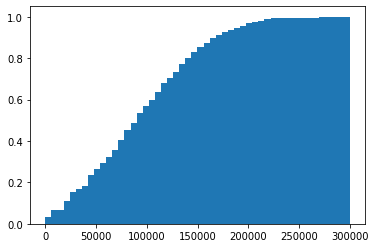

In [132]:
plt.hist(vals, bins=50, cumulative=True, density=True)
plt.show()

In [133]:
np.percentile(vals, [5,10,50,90]) 

array([  9366.37618955,  18629.66716428,  91757.73836267, 169823.62612117])

In [143]:
def sim_run_discount(discount_rate):
    year = 0
    values_sum = 1
    discount_rate = np.random.normal(discount_rate, 0.01, 1)[0]
    for annual_death_probability in probs:
        random_var = random.uniform(0, 1)
        is_dead = random_var < annual_death_probability
        if is_dead:
            return values_sum
        else:
            year+=1
            discount_factor = 1/(1*(1+discount_rate) ** year)
            income = annual_state_pension * discount_factor
            values_sum+=income
            continue
    return values_sum

In [177]:
rates = np.linspace(-0.02, 0.05, 100)
vals = {}
for rate in rates:
    vals[rate] = []
    for i in range(1000):
        res = sim_run_discount(rate)
        vals[rate].append(res)

In [178]:
dists = []
for val in vals:
    res = vals[val]
    dists.append([val, *np.percentile(res, [10,50,75])])

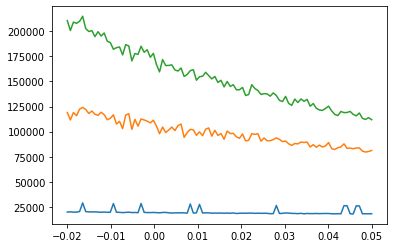

In [179]:
labels = [i[0] for i in dists]
plt.plot(labels, [i[1] for i in dists])
plt.plot(labels, [i[2] for i in dists])
plt.plot(labels, [i[3] for i in dists])
plt.show()

In [185]:
val = []
for i in dists:
    if i[0] > 0.018 and i[0] < 0.022:
        val.append(i[2])
sum(val) / len(val)

94402.48435627048

##How much is the state pension worth?##

This post explains the results of a simulation analysis used to calculate the value of the state pension.

The value of the state pension per week will be £185.15/week, multipled by 52.14 weeks in a year for a total of ~£9,650 per year.

First, consider life expectancy. How much value we get out of the state pension is primarily a function of age; the length of time that it is collected. Probability of death from the age of 66 is, roughly, a linear function of age. As you get older, the probability of dying increases at a roughly constant rate.The equation used is:

f(x) = x*0.0042083333333333-0.2425

where x is age. The actual numbers are included only so that these results can be reproduced, they are not relevant to the results.

Each year of the simulation, we draw a random number and either collect another year or die returning the total value extracted over the lifetime. In other words, the simulation models life expectancy randomly, and the range of values in the result takes into account life expectancy for the average person.

Second, the value of money tomorrow does not have the same value of money today. Money we receive in the final year of our state pension does not have the same value at retirement as that received that year.

The value chosen is open to debate, and depends on the theoretical interpretation given to the value of future money. In this case, we use a normally-distributed discount rate that is constant over the simulation length with 3% mean and 1% standard deviation. This value is chosen because it is roughly equal to the risk-free rate. We will present results later with varying discount rates to show how this impacts results.

To be clear, adding up all the cash flows over the lifetime would only tell you the cash amount extracted, not the value of that the benefit at retirement age. The purpose of this analysis is purely to calculate the present value at retirement age.

The distribution of state pension values:

And the distribution of cumulative values:

The first chart shows the distribution of final values: running the simulation 1000 times, and taking the discounted value of the total sum extracted over each simulation run.

The second chart shows the cumulative probability of those final values.The y-axis is slightly confusing because it actually needs to be flipped to show the value that seems intuitive. For example the y-value at £100k is 0.6 or 60%, this says that the total value extracted exceeded £100k in 40% (1-0.6 = 0.4) of runs.

To say this numerically: the 10th percentile result (beaten 90% of the time) is £16k, 50th percentile (i.e. median) is £90k, and the 90th percentile result (occuring 10% of the time) is £169k.

And how does this vary by discount rate:

The blue line shows the variation at the 10th percentile, the orange line is the median, and the green is the 75th percentile (the last changed to make the chart easier to read). The value increases as the discount rate goes lower because when the rate is negative, money tomorrow is actually worth more than money today. This may occur in reality due to a prolonged period of deflation.

The scale of the y-axis is in pounds so the green line looks like it is accelerating but that is mostly due to the fact that the values are larger and we are taking percentages of those values: a 10% discount rate at £500k and £50k have quite different proportions even though the rate is the same.

This is important because the median result is linear although it may seem like it is accelerating slowly. As the discount rates, we see a proportional but not accelerating drop in the value of the state pension. The previous results, therefore, were not due to some strangeness of life expectancy calculation and discount rates still have a linear impact on final values.

The conclusion from this post is that the median value of the state pension is ~£90k in today's values assuming a 3% discount rate. At 2%, the value is closer to ~£95k. At 4%, closer to ~£85k. 